In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os

In [2]:
PATH_TO_COORDINATES = "../Helix_files/"

In [3]:
os.listdir(PATH_TO_COORDINATES)[1:]

['Microtubules_00001.txt',
 'Microtubules_00002.txt',
 'Microtubules_00003.txt',
 'Microtubules_00004.txt',
 'Microtubules_00005.txt',
 'Microtubules_00006.txt',
 'Microtubules_00007.txt',
 'Microtubules_00008.txt',
 'Microtubules_00010.txt',
 'Microtubules_00011.txt',
 'Microtubules_00012.txt',
 'Microtubules_00013.txt',
 'Microtubules_00014.txt',
 'Microtubules_00015.txt',
 'Microtubules_00016.txt',
 'Microtubules_00017.txt',
 'Microtubules_00018.txt',
 'Microtubules_00019.txt',
 'Microtubules_00021.txt',
 'Microtubules_00022.txt',
 'Microtubules_00023.txt',
 'Microtubules_00024.txt',
 'Microtubules_00025.txt',
 'Microtubules_00027.txt',
 'Microtubules_00030.txt',
 'Microtubules_00032.txt',
 'Microtubules_00034.txt',
 'Microtubules_00035.txt',
 'Microtubules_00036.txt',
 'Microtubules_00037.txt',
 'Microtubules_00038.txt',
 'Microtubules_00039.txt',
 'Microtubules_00040.txt',
 'Microtubules_00041.txt',
 'Microtubules_00044.txt',
 'Microtubules_00045.txt',
 'Microtubules_00046.txt',
 

In [4]:
#parse each file
file_library = {}
threshold_score = -2.5

for file in os.listdir(PATH_TO_COORDINATES)[1:]:
    df = pd.read_csv(PATH_TO_COORDINATES+"/"+file, sep="\t")
    df = df.drop(df[df.score<threshold_score].index)
    x = df["x_coord"].to_numpy()
    y = df["y_coord"].to_numpy()
    tup = (x,y)
    file_library.update({file: tup})

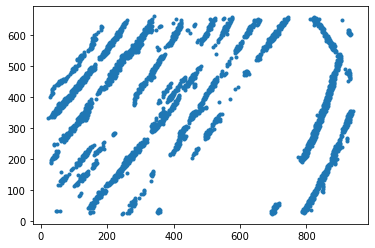

In [5]:
#visualize one file
img = file_library["Microtubules_00222.txt"]
plt.scatter(img[0],img[1], marker=".")

(639, 916)


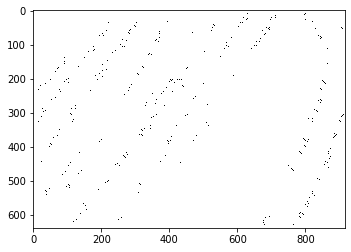

In [6]:
#plot data on numpy matrix
xmin = np.min(img[0])
xmax = np.max(img[0])

ymin = np.min(img[1])
ymax = np.max(img[1])

Field = np.zeros(((ymax-ymin),(xmax-xmin)))
print(Field.shape)
for i in range(img[0].shape[0]):
    Field[img[1][i]-(1+ymin),img[0][i]-(1+xmin)]=1
plt.imshow(np.flip(Field, axis=0), cmap = "binary")

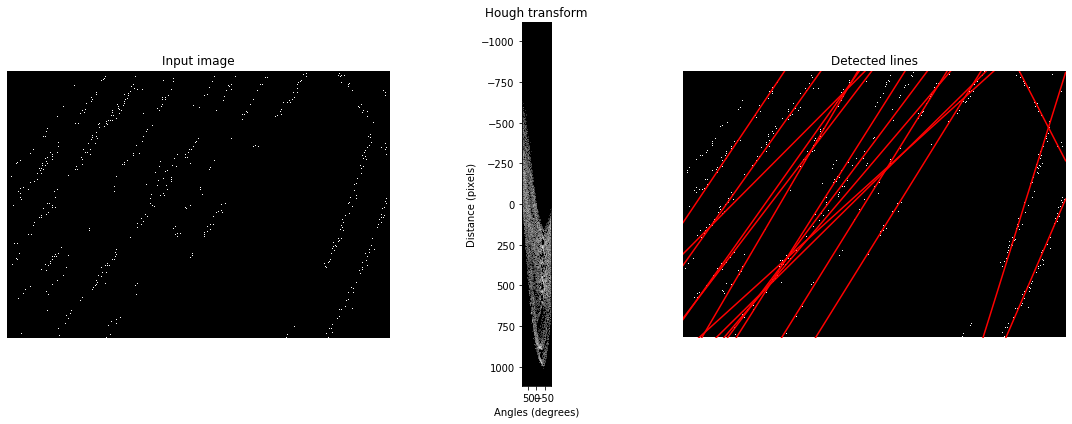

In [154]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.flip(Field, axis=0)

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
origin = np.array((0, image.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

In [137]:
matrix = np.zeros((10,10))
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [138]:
idx =np.arange(0,10)
matrix[idx[:], [0,0,0,0,0,0,0,0,0,0]] = 15

In [139]:
matrix

array([[15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

neigh = neighbors.RadiusNeighborsClassifier(radius = 1)
X= img[0]
y= img[1]

X = np.reshape(X, (X.shape[0],1))
print(X)

neigh.fit(X,y)

[[ 88]
 [ 88]
 [ 87]
 [ 87]
 [ 88]
 [241]
 [ 86]
 [229]
 [ 87]
 [ 88]
 [ 88]
 [240]
 [ 88]
 [ 88]
 [240]
 [240]
 [242]
 [239]
 [240]
 [180]
 [241]
 [ 87]
 [241]
 [ 88]
 [216]
 [242]
 [240]
 [238]
 [229]
 [241]
 [ 87]
 [239]
 [242]
 [243]
 [241]
 [239]
 [239]
 [244]
 [236]
 [238]
 [244]
 [240]
 [241]
 [240]
 [ 84]
 [179]
 [242]
 [244]
 [239]
 [243]
 [236]
 [240]
 [239]
 [179]
 [216]
 [156]
 [239]
 [243]
 [243]
 [240]
 [244]
 [238]
 [ 88]
 [243]
 [225]
 [241]
 [ 84]
 [239]
 [224]
 [240]
 [240]
 [179]
 [243]
 [240]
 [241]
 [239]
 [241]
 [240]
 [214]
 [239]
 [239]
 [ 84]
 [238]
 [179]
 [ 89]
 [225]
 [237]
 [232]
 [157]
 [244]
 [181]
 [231]
 [165]
 [ 84]
 [244]
 [237]
 [244]
 [238]
 [243]
 [178]
 [243]
 [155]
 [241]
 [214]
 [245]
 [240]
 [180]
 [243]
 [ 84]
 [182]
 [243]
 [241]
 [233]
 [174]
 [239]
 [244]
 [226]
 [ 83]
 [240]
 [245]
 [234]
 [238]
 [215]
 [237]
 [213]
 [229]
 [239]
 [165]
 [237]
 [241]
 [237]
 [229]
 [242]
 [238]
 [241]
 [ 85]
 [213]
 [242]
 [243]
 [237]
 [239]
 [238]
 [ 83]

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=1, weights='uniform')

Automatically created module for IPython interactive environment
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]


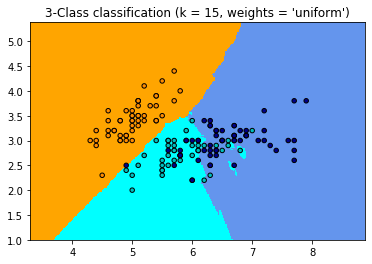

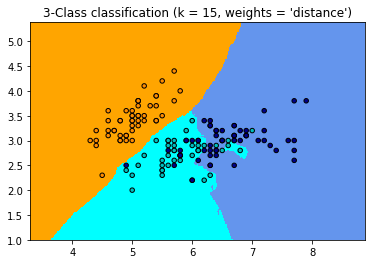

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

print(X)
print(y)

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    print(len(X))
    print(len(y))
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

(40, 1)
(500, 1)
(40,)


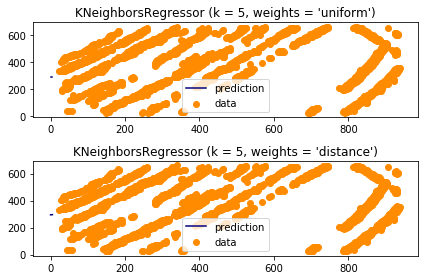

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
print(X.shape)
T = np.linspace(0, 5, 500)[:, np.newaxis]
print(T.shape)
y = np.sin(X).ravel()
print(y.shape)

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

X=np.reshape(img[0], (-1,1))
y=np.reshape(img[1], (-1,1))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

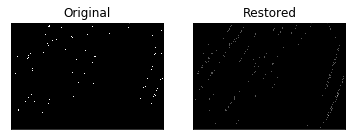

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import probabilistic_hough_line
from skimage import draw

def restore_lines(distorted):
    lines = probabilistic_hough_line(distorted,
                                     threshold=2,
                                     line_length=20,
                                     line_gap=15)

    restored = np.zeros_like(distorted, dtype=np.uint8)
    for line in lines:
        p0, p1 = line
        rr, cc = draw.line(p0[1], p0[0], p1[1], p1[0])
        restored[rr, cc] += 1
    return restored

# imread returns non-grayscale image in this case
distorted = np.flip(Field, axis=0)

# restore
restored = restore_lines(distorted)

fig, axes = plt.subplots(1,2)
axes[0].imshow(distorted, cmap='gray', interpolation='none')
axes[1].imshow(restored, cmap='gray', interpolation='none')
axes[0].set_title('Original')
axes[1].set_title('Restored')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

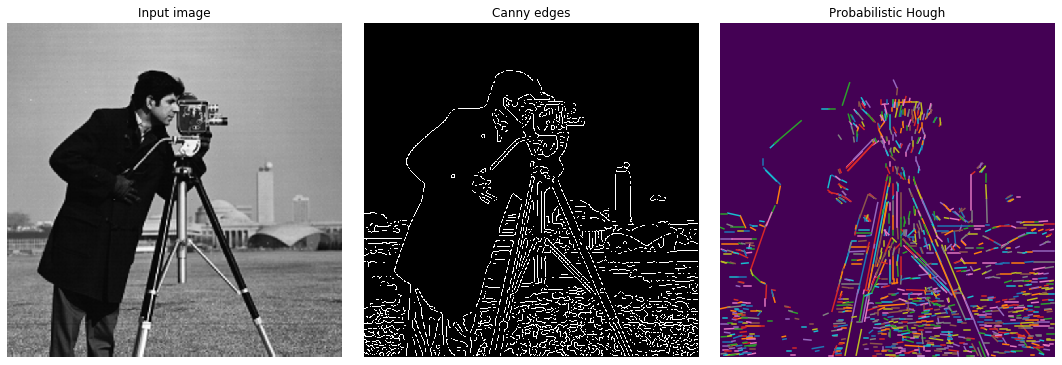

In [149]:
from skimage.transform import probabilistic_hough_line

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Estimated number of clusters: 36')

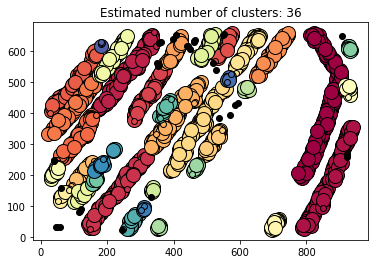

In [10]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################

#provide a m * 2 coordinate array for the data points on xy plane
X = np.concatenate((img[0][...,np.newaxis], img[1][...,np.newaxis]), axis = 1)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=15, min_samples=5).fit(X)
#obtain a mask for the useful data points, as defined by "core samples",
#they contain sufficient number of neighbours within the eps distance
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# obtain the classification labels mapped from each point
labels = db.labels_



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
# create a set of labels
unique_labels = set(labels)
# create a corresponding set of colours for bijection to the the set of labels
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

list_of_clusters = []

# for each class label and its colour
for k, col in zip(unique_labels, colors):
    # set the colour to black if the class is assigned to -1 (noise)
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        
    # obtain a boolean vector to select for coordinates in X of the current k only
    class_member_mask = (labels == k)
    
    #obtain a list of coordinates from X if they belong to the current k(class) and they are "core samples"
    xy = X[class_member_mask & core_samples_mask]
    
    
    # plot the core samples as large dots
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # plot the non-core samples as smaller dots using a mask for: current k, not "core samples"
    xy_not_core = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy_not_core[:, 0], xy_not_core[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
    cluster = np.concatenate((xy, xy_not_core))
    list_of_clusters.append(cluster)

plt.title('Estimated number of clusters: %d' % n_clusters_)

MSE of the linear fit: 2720.127509784757
MSE of the polynomial fit: 2155.4506625730396
Polynomial model chosen
(168.59507168458782, 683.4049283154121)
(581.5950716845879, 1096.4049283154122)


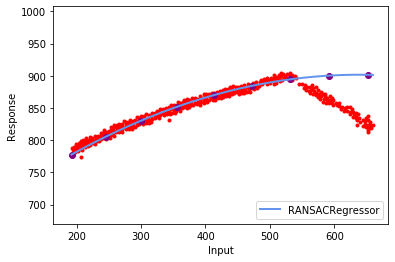

MSE of the linear fit: 3244.6445739214932
MSE of the polynomial fit: 3273.2340365940836
Polynomial model chosen
(8.395071684587812, 373.60492831541217)
(679.8950716845878, 1045.104928315412)


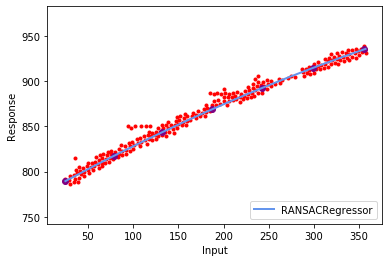

MSE of the linear fit: 5887.405555570803
MSE of the polynomial fit: 5137.80319712702
Polynomial model chosen
(399.4950716845878, 674.5049283154123)
(121.99507168458771, 397.00492831541214)


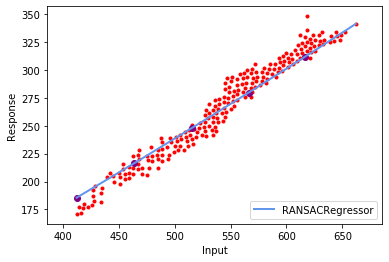

MSE of the linear fit: 6413.386573490538
MSE of the polynomial fit: 6334.6904896011965
Polynomial model chosen
(13.045071684587814, 275.9549283154121)
(98.05808741071908, 360.9679440415433)


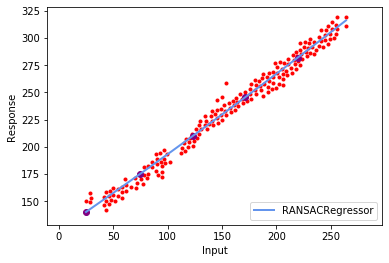

MSE of the linear fit: 1924.2238855251317
MSE of the polynomial fit: 1920.5001459038706
Polynomial model chosen
(365.69507168458773, 548.3049283154122)
(234.4353884887773, 417.04524511960176)


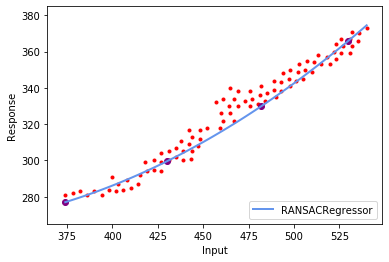

MSE of the linear fit: 428.0233639490618
MSE of the polynomial fit: 421.9278208051846
Polynomial model chosen
(563.3950716845878, 664.604928315412)
(499.8950716845879, 601.104928315412)


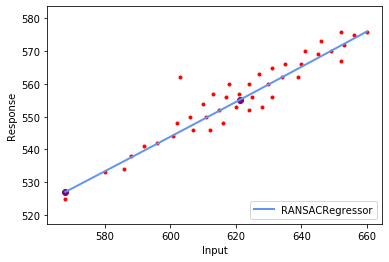

MSE of the linear fit: 3993.8591835037587
MSE of the polynomial fit: 3904.939796716001
Polynomial model chosen
(391.54507168458775, 621.4549283154122)
(-11.563203219933172, 218.34665341089126)


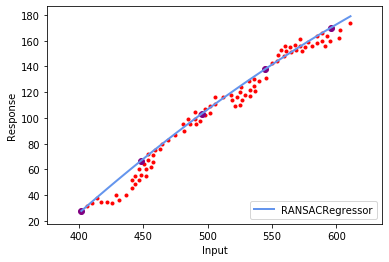

MSE of the linear fit: 1681.9010706443196
MSE of the polynomial fit: 1740.0759658534846
Polynomial model chosen
(242.74507168458777, 402.2549283154121)
(27.745071684587842, 187.25492831541214)


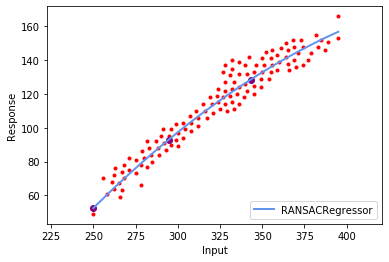

MSE of the linear fit: 3198.208256735417
MSE of the polynomial fit: 3268.203324676073
Polynomial model chosen
(324.1950716845878, 517.8049283154122)
(-6.240837286816117, 187.3690193440083)


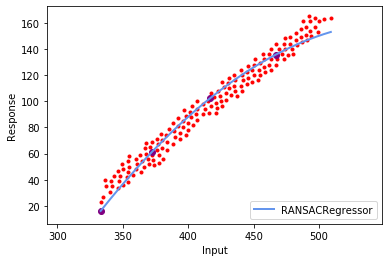

MSE of the linear fit: 1595.1848485500893
MSE of the polynomial fit: 1648.9554356655892
Polynomial model chosen
(512.0450716845878, 664.9549283154121)
(620.5450716845878, 773.4549283154122)


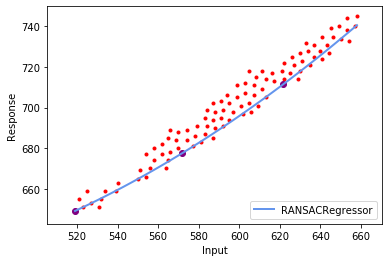

MSE of the linear fit: 377.30553821745383
MSE of the polynomial fit: 430.8092595364964
Polynomial model chosen
(558.6950716845878, 653.3049283154122)
(351.81315156123065, 446.4230081920551)


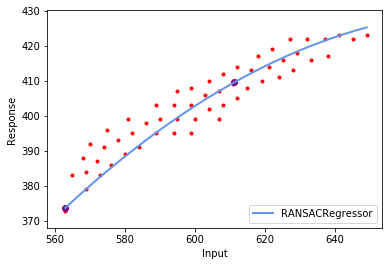

MSE of the linear fit: 3520.202367225172
MSE of the polynomial fit: 3759.5415744824672
Polynomial model chosen
(277.34507168458777, 511.6549283154122)
(289.84507168458777, 524.1549283154121)


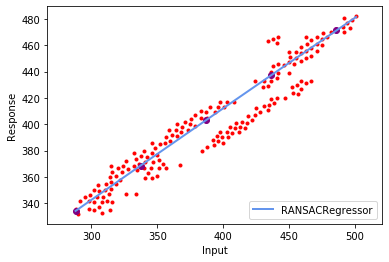

MSE of the linear fit: 596.5134716959379
MSE of the polynomial fit: 582.3881201510964
Polynomial model chosen
(162.0450716845878, 248.95492831541216)
(82.04507168458782, 168.9549283154122)


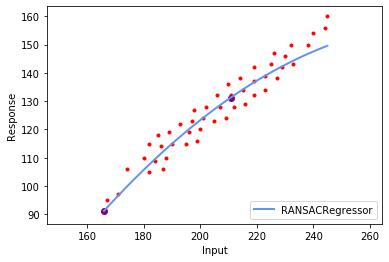

MSE of the linear fit: 238.0946181149849
MSE of the polynomial fit: 218.88311723273935
Polynomial model chosen
(261.9950716845878, 350.00492831541214)
(476.49507168458786, 564.5049283154121)


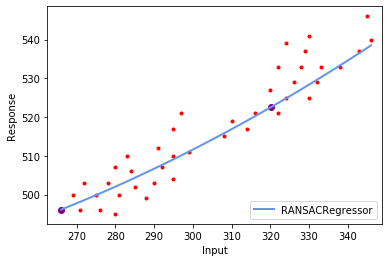

MSE of the linear fit: 4824.309751971452
MSE of the polynomial fit: 5032.242624262154
Polynomial model chosen
(198.3950716845878, 497.60492831541217)
(326.08006228063766, 625.289918911462)


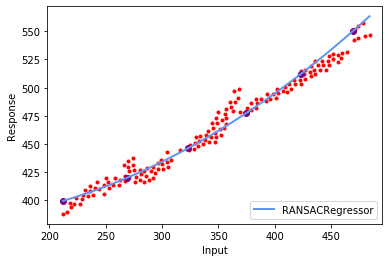

MSE of the linear fit: 863.2407591257227
MSE of the polynomial fit: 810.9345604663678
Polynomial model chosen
(524.9450716845879, 658.0549283154122)
(552.106324442796, 685.2161810736202)


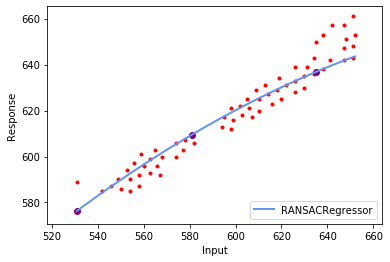

MSE of the linear fit: 173.1740808635459
MSE of the polynomial fit: 158.94330989123205
Polynomial model chosen
(115.79241169977924, 153.20758830022075)
(49.292411699779244, 86.70758830022076)


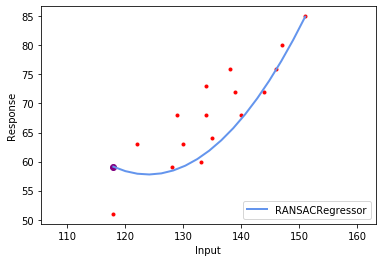

MSE of the linear fit: 72.80050158874603
MSE of the polynomial fit: 85.20434263444747
Polynomial model chosen
(22.345071684587815, 58.654928315412185)
(686.8450716845878, 723.1549283154122)


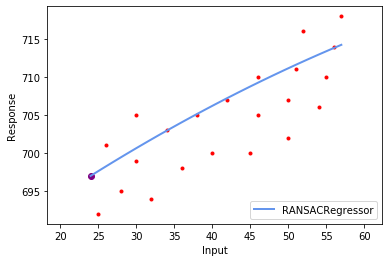

C:\Users\Zhe Fan\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


MSE of the linear fit: 21.18036634017697
MSE of the polynomial fit: 25.991136130318157
Polynomial model chosen
(452.09507168458777, 493.9049283154121)
(903.0950716845878, 944.9049283154122)


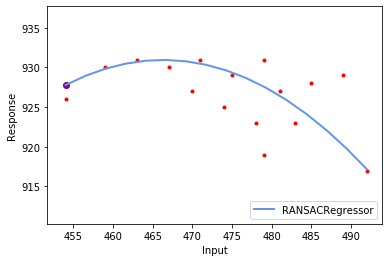

MSE of the linear fit: 89.9348955266034
MSE of the polynomial fit: 84.0973854874453
Polynomial model chosen
(185.0450716845878, 227.9549283154122)
(19.87835910409082, 62.7882157349152)


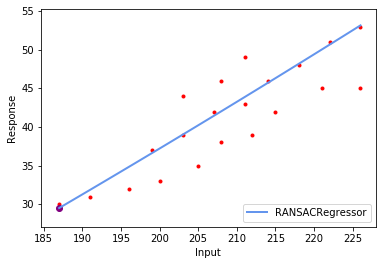

MSE of the linear fit: 1037.1197322792252
MSE of the polynomial fit: 955.1107648494275
Polynomial model chosen
(516.6950716845878, 655.3049283154122)
(147.69507168458773, 286.30492831541216)


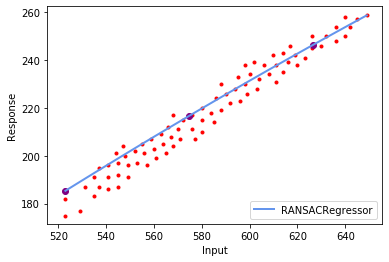

MSE of the linear fit: 256.27135709712223
MSE of the polynomial fit: 236.68398525489843
Polynomial model chosen
(111.64507168458782, 163.3549283154122)
(96.56022254751963, 148.27007917834402)


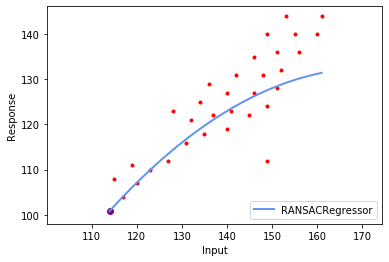

MSE of the linear fit: 361.8147903966004
MSE of the polynomial fit: 341.4895783053082
Polynomial model chosen
(566.7950716845879, 659.2049283154121)
(451.2950716845879, 543.7049283154121)


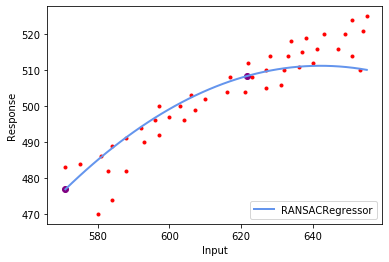

MSE of the linear fit: 9.642857142857057
MSE of the polynomial fit: 31.321970852282863
Polynomial model chosen
(143.4551594425783, 164.5448405574217)
(329.95511669658424, 351.04479781142766)


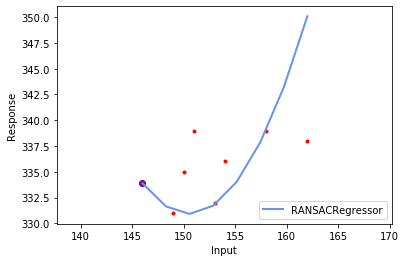

MSE of the linear fit: 26.37084903277147
MSE of the polynomial fit: 24.621299771883983
Polynomial model chosen
(470.29241169977917, 485.7075883002207)
(611.2924116997792, 626.7075883002208)


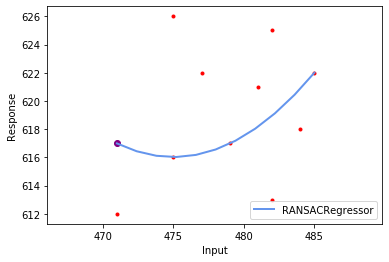

MSE of the linear fit: 33.46330739128517
MSE of the polynomial fit: 29.42593751616732
Polynomial model chosen
(22.366975080659692, 41.63302491934029)
(349.11737200713196, 368.38342184581256)


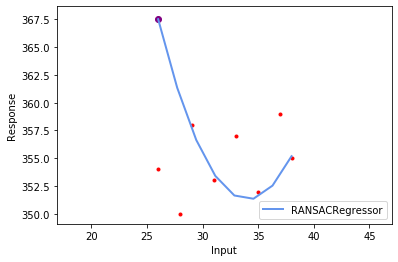

MSE of the linear fit: 121.32277003165291
MSE of the polynomial fit: 103.8392915714278
Polynomial model chosen
(201.34507168458785, 237.65492831541215)
(446.34507168458777, 482.6549283154121)


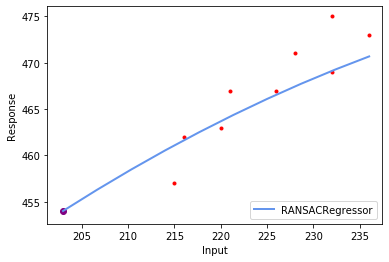

MSE of the linear fit: 25.326136836069967
MSE of the polynomial fit: 21.090828812698216
Polynomial model chosen
(599.0450716845878, 619.9549283154122)
(918.6720805956359, 939.5819372264602)


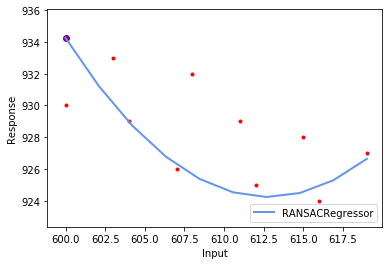

MSE of the linear fit: 26.407346251722146
MSE of the polynomial fit: 34.32960017714155
Polynomial model chosen
(170.7950716845878, 197.2049283154122)
(148.62728313032346, 175.03713976114784)


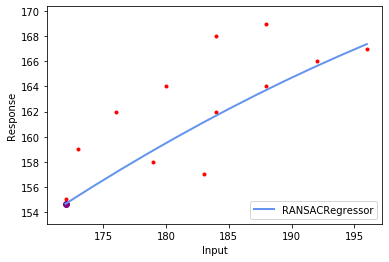

MSE of the linear fit: 331.62661917142873
MSE of the polynomial fit: 333.66888188315147
Polynomial model chosen
(379.84507168458777, 449.1549283154122)
(337.4845522582307, 406.79440888905515)


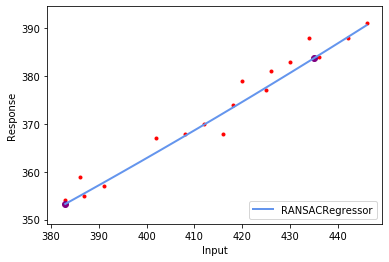

MSE of the linear fit: 215.087655404765
MSE of the polynomial fit: 209.06008850307472
Polynomial model chosen
(22.54507168458781, 76.45492831541219)
(245.0450716845878, 298.9549283154122)


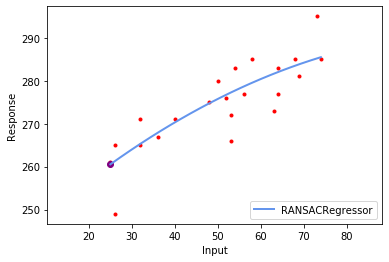

MSE of the linear fit: 7.936891964525631
MSE of the polynomial fit: 7.0378906249998066
Polynomial model chosen
(276.54507168458775, 286.4549283154122)
(216.04507168458778, 225.95492831541222)


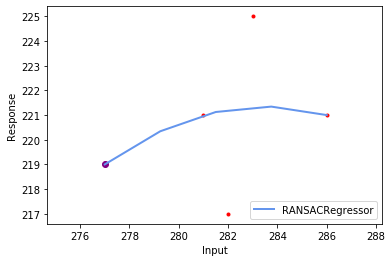

MSE of the linear fit: 66.07569265600617
MSE of the polynomial fit: 66.60617102464894
Polynomial model chosen
(210.89507168458783, 257.10492831541217)
(152.89507168458783, 199.10492831541217)


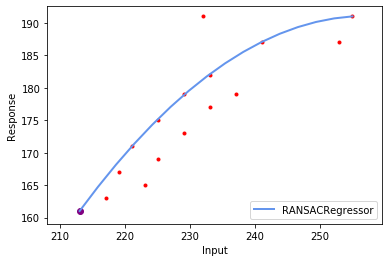

MSE of the linear fit: 14.84375
MSE of the polynomial fit: 10.040390956422247
Polynomial model chosen
(85.29507168458781, 100.70492831541218)
(299.4794309810902, 314.8892876119146)


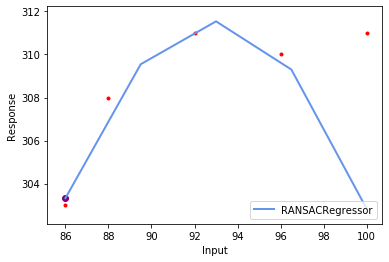

MSE of the linear fit: 40.743292809311434
MSE of the polynomial fit: 27.521814866158845
Polynomial model chosen
(499.7450716845878, 527.2549283154123)
(553.2450716845877, 580.7549283154123)


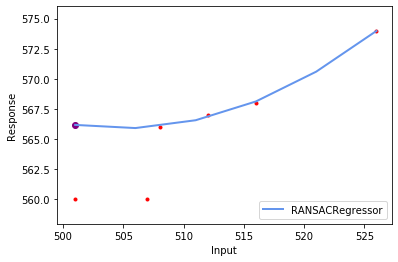

MSE of the linear fit: 48.5
MSE of the polynomial fit: 1.0893877550641768
Polynomial model chosen
(618.3950716845877, 631.6049283154123)
(176.89507168458772, 190.10492831541228)


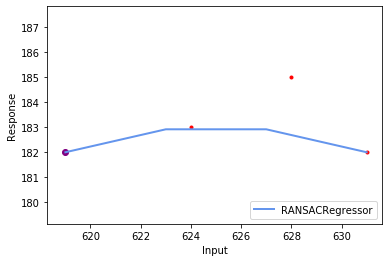

MSE of the linear fit: 293901.58809336985
MSE of the polynomial fit: 272358.6453347372
Polynomial model chosen
(-303.79221334770205, 1265.792213347702)
(-842.232781572685, 727.351645122719)


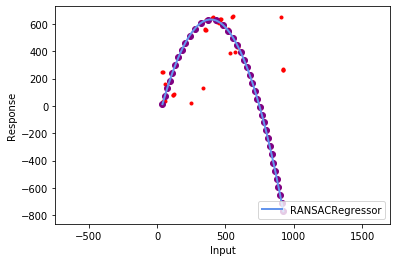

In [20]:
from utils import ransac_fit

for cluster in list_of_clusters:
    poly_o = ransac_fit.polyfit(cluster, 2, 1, disable_linear = True, directory_mode=False)
    arclength_o = ransac_fit.arclength(poly_o)
    x = ransac_fit.spacing(arclength_o, 60.218)
    
    y = poly_o["model"].predict(x)
    
    plt.scatter(x, y, color="purple")
    plt.show()

In [55]:
ransac_fit.polyfit()

TypeError: polyfit() missing 3 required positional arguments: 'data', 'order', and 'maxdistance'

In [51]:
ransac_fit.polyfit_np()

AttributeError: module 'ransac_fit' has no attribute 'polyfit_np'

In [9]:

ransac_fit.__file__

'C:\\Users\\Zhe Fan\\Bui Python Code\\src\\utils\\ransac_fit.py'